<a id='top'></a>

# CSCI 3022: Intro to Data Science - Spring 2019 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Monday March 4**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**: Parikshit Bhetwal

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Bottom](#bot)

---

In [1]:
from scipy import stats
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

### [30 points] Problem 1: The Game of Strife

Below, and at the [link here](http://www.cs.colorado.edu/~tonyewong/home/resources/game_of_strife.png), you will find the board for the ***Game of Strife***, a simplified and slightly more depressing version of the [Game of Life](https://en.wikipedia.org/wiki/The_Game_of_Life). Here are some rules:

- Players begin at START and may choose to begin the game by either going to college (moving to the right from START) or starting a career (moving downward from START). Players then move along the game board in order of increasing tile number. 
    - If a player begins by going to college, then they start the game with -\$20,000. That is indeed negative money, to account for student loan debt.
    - If a player begins by starting a career, then they start the game with \$5,000.

<p> </p>

- At the beginning of a player's turn, they roll a fair 6-sided die, the outcome of which determines how many tiles they move forward.

<p> </p>

- When a player reaches a red square (tiles 9, 17 or 30), they must stop at that square for the rest of their turn, even if they would not have landed on the red square.
    - When a player stops on the CAREER tile after college (square 9), they are randomly assigned a career and salary from the possibilities: \$50,000, \$70,000, \$90,000, \$110,000, or \$130,000 (all with equal probability). The player's actual career is irrelevant to the game, but please make something up so you are emotionally invested in the game.
    - If a player starts a career at the beginning of the game, they are assigned a salary randomly from possibilities \$40,000, \$50,000, \$60,000, \$70,000, or \$80,000.
    - When a player stops on the HOUSE tile, they put a down payment on a house. This down payment is drawn randomly from the set \$25,000, \$40,000, \$55,000 or \$70,000.
    - When a player stops on the RETIRE tile, the player collects a pension equal to half their salary and then the game ends immediately.

<p> </p>

- When a player lands on or passes a PAYDAY square, they earn money equal to their salary.

<p> </p>

- When a player lands on a STRIFE square (1, 4, 7, 13, 18, 23 or 29 if they go to college, or 2, 7, 13, 18, 23 or 29 if they start a career immediately at the beginning of the game), they draw a STRIFE card. The STRIFE cards have the player earn \$5,000 or \$10,000, or lose \$1,000, \$2,000 or \$5,000.

<p> </p>

- Players can have negative money, which corresponds to being in debt.


<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/game_of_strife.png" style="width: 700px;"/>

**Part A:** Write code to simulate an entire game of the Game of Strife (with only one player). You may **not** have two separate routines for simulating the game, or a turn, depending on whether a player goes to college or starts a career at the beginning; both possibilities should be accounted for within your one set of codes.

Then run two ensembles of at least 10,000 games, one where the player starts by going to college, the other where the player starts a career immediately. Plot density histograms of the players' ending distributions of money on the same set of axes. Be sure to label your axes, include a legend and make your histogram box faces slightly transparent, so both sets of data are visible.

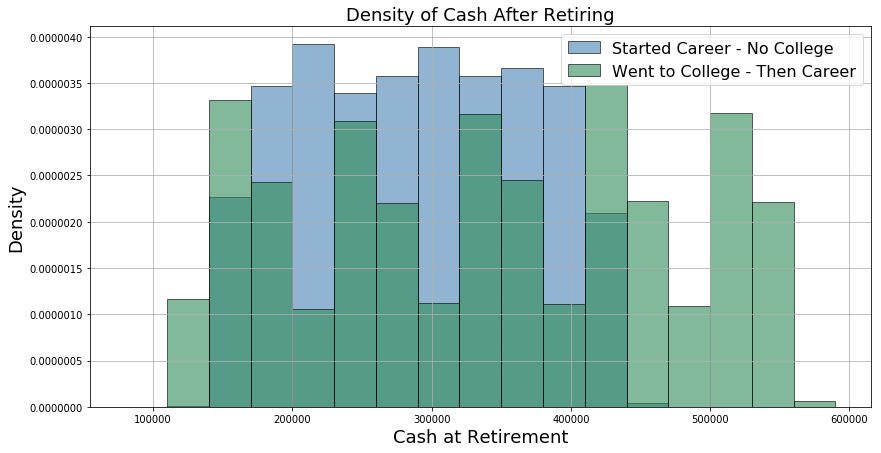

In [11]:
def GameofStrife(start):
    if(start == 'College'):
        cash, state, salary = 0, 0, 0
        firstPay, secondPay, thirdPay, fourthPay = False, False, False, False 
        gotCareer, gotHouse, retired, landedStrife = False, False, False, False
        if(state == 0):
            cash += -20000 
            #print("You began college with ${} in debt.".format(abs(cash)))
            #print("------------------------------------------------------------")
        while(state != 30 or state >= 30):
            dice = np.random.choice(6)+1
            state += dice
            collegeStrife = [1,4,7,13,18,23,29]
            if(state in collegeStrife):
                card = np.random.choice([5000, 10000,-1000, -2000, -5000]) 
                cash += card
                landedStrife = True 
                #if(card > 0):
                    #print("You drew a STRIFE card and gained ${}.".format(card))
                    #print("------------------------------------------------------------")
                #if(card < 0):
                    #print("You drew a STRIFE card and lost ${}.".format(abs(card)))
                    #print("------------------------------------------------------------")
            if(gotCareer == False):
                if(state >= 9): 
                    state = 9 
                    careerpath = ['Doctor', 'Nurse', 'Software Developer', 'Tutor', 'Bartender', 'Batman']
                    salary = np.random.choice([50000, 70000, 90000,110000, 130000]) 
                    #print("Congratulations, you have become a {} after college!".format(np.random.choice(careerpath)))
                    #print("------------------------------------------------------------")
                    #print("Your salary is ${}.".format(salary))
                    #print("------------------------------------------------------------")
                    gotCareer = True 
            if(state >= 10 or state >= 16 or state >= 22 or state >= 27):
                if(firstPay == False):
                    cash += salary
                    #print("It is payday! You got paid ${}.".format(salary))
                    #print("------------------------------------------------------------")
                    firstPay = True 
                if(secondPay == False): 
                    cash += salary
                    #print("It is payday! You got paid ${}.".format(salary))
                    #print("------------------------------------------------------------")
                    secondPay = True 
                if(thirdPay == False):
                    cash += salary
                    #print("It is payday! You got paid ${}.".format(salary))
                    #print("------------------------------------------------------------")
                    thirdPay = True
                if(fourthPay == False):
                    cash += salary
                    #print("It is payday! You got paid ${}.".format(salary))
                    #print("------------------------------------------------------------")
                    fourthPay = True
            if(gotHouse == False):
                if(state >= 17):
                    state = 17
                    downPayment = np.random.choice([-25000, -40000, -55000,-70000])
                    cash += downPayment 
                    #print("You put a down payment on a house for ${}.".format(abs(downPayment)))
                    #print("------------------------------------------------------------")
                    gotHouse = True 
            if(retired == False):
                if(state >= 30):
                    state = 30
                    pension = salary/2
                    cash += pension 
                    #print("You retired with ${}!".format(cash)) 
                    retired = True 
                    break
        return cash, landedStrife
    
    elif(start == 'Career'):
        cash, state, salary = 0, 0, 0
        firstPay, secondPay, thirdPay, fourthPay, fifthPay = False, False, False, False, False
        gotCareer, gotHouse, retired, landedStrife = False, False, False, False
        if(state == 0):
            cash += 5000
            careerpath = ['Cashier', 'Welder', 'Soldier', 'Tutor', 'Iron Man', 'Batman']
            salary = np.random.choice([40000, 50000, 60000, 70000, 80000])
            #print("Congratulations, you have become a {}!".format(np.random.choice(careerpath)))
            #print("------------------------------------------------------------")
            #print("Your salary is ${}.".format(salary))
            #print("------------------------------------------------------------")
            gotCareer = True 
        while(state != 30 or state >= 30):
            dice = np.random.choice(6)+1
            state += dice
            careerStrife = [2, 7, 13, 18, 23, 29]
            if(state in careerStrife):
                card = np.random.choice([5000, 10000,-1000, -2000, -5000])
                cash += card
                landedStrife = True
                #if(card > 0):
                    #print("You drew a STRIFE card and gained ${}.".format(card))
                    #print("------------------------------------------------------------")
                #if(card < 0):
                    #print("You drew a STRIFE card and lost ${}.".format(abs(card)))
                    #print("------------------------------------------------------------")
            if(state >= 4 or state >= 10 or state >= 16 or state >= 22 or state >= 27):
                if(firstPay == False): 
                    cash += salary 
                    #print("It is payday! You got paid ${}.".format(salary))
                    #print("------------------------------------------------------------")
                    firstPay = True 
                if(secondPay == False): 
                    cash += salary 
                    #print("It is payday! You got paid ${}.".format(salary))
                    #print("------------------------------------------------------------")
                    secondPay = True 
                if(thirdPay == False): 
                    cash += salary 
                    #print("It is payday! You got paid ${}.".format(salary))
                    #print("------------------------------------------------------------")
                    thirdPay = True 
                if(fourthPay == False):
                    cash += salary 
                    #print("It is payday! You got paid ${}.".format(salary))
                    #print("------------------------------------------------------------")
                    fourthPay = True 
                if(fifthPay == False):
                    cash += salary 
                    #print("It is payday! You got paid ${}.".format(salary))
                    #print("------------------------------------------------------------")
                    fifthPay = True 
            if(gotHouse == False):
                 if(state >= 17):
                    state = 17
                    downPayment = np.random.choice([-25000, -40000, -55000,-70000])
                    cash += downPayment 
                    #print("You put a down payment on a house for ${}.".format(abs(downPayment)))
                    #print("------------------------------------------------------------")
                    gotHouse = True 
            if(retired == False):
                if(state >= 30):
                    state = 30
                    pension = salary/2
                    cash += pension 
                    #print("You retired with ${}!".format(cash)) 
                    retired = True 
                    break
        return cash, landedStrife

careerArr = np.zeros(10000)
collegeArr = np.zeros(10000) 

for i in range(10000):
    careerArr[i] = GameofStrife('Career')[0]
    collegeArr[i] = GameofStrife('College')[0]
    
careerArr = pd.Series(careerArr)
collegeArr = pd.Series(collegeArr)
fig, ax = plt.subplots(figsize=(14,7))
bins = range(80000,600000,30000)
careerArr.hist(edgecolor = 'black', ax = ax, color = "steelblue", bins = bins, alpha = 0.6, density = True,  label = "Started Career - No College")
collegeArr.hist(edgecolor = 'black', ax = ax, color = "seagreen", bins = bins, alpha = 0.6, density = True,  label = "Went to College - Then Career")
ax.set_xlabel("Cash at Retirement", fontsize = 18)
ax.set_ylabel("Density", fontsize = 18)
ax.set_title("Density of Cash After Retiring", fontsize = 18)
ax.legend(fontsize = 16)

**Part B:** Use concepts from class to describe the two distributions of player cash at retirement, depending on whether or not they went to college or immediately started a career. How are the two distributions similar? How do they differ? Address characteristics like skew, modality, central tendency and spread. How could the rules of the Game of Strife account for these differences?

# Similarities 
The similarities that we can observe is that individuals who start at college and individuals who start with a career both are capable of retiring in the range between 200,000 dollars and 400,000 dollars. 

# Differences 
Individuals who go to college are capable of retiring with more money than individuals who start a career right away. We can explain this difference through the rule of Game of Strife where individuals who go to college are randomly assigned higher salaries than their non-college attending counterparts. 

# Modality 
College graduates seem have to have a __multimodal__ distribution for the amount of cash they have at retirement. I say this because we can see multiple peaks and dips in the data for college graduates.
<br><br>
Individuals who did not attend college seem to have a __unimodal__ distribution for the amount of cash that they have at retirement. I say this because we can see a significant increase in density from about 200,000 dollars to 400,000. However, the density before these bins dips significantly. Thus, I have observed only one significant increase in density in the previously mentioned bins and therefore this seems unimodal. 

# Skew
One another similarity that we can observe in these two distributions is that there appears to be __no skew__ in both of the density histograms. I say this because when comparing the mean and median in the code below, the difference is something incredibly small, only hundreds of dollars. Given that my simulation function makes it such that the data returned can vary slightly because of randomness, I believe there is no skew. To elaborate, sometimes the mean can be greater than the median and sometimes the median can be greater than the mean for my data by only hundreds of dollars because of the randomness of this game. 

# Central Tendency
We can look towards the mean to describe the central tendency. For the people who started in college, the mean is around 340,000 dollars and for people who started with a career is around 290,000 dollars. Thus, the central tendency for people who went to college is around greater values than the central tendency for people who did not due to this difference in means. 

# Spread 
From the code in the cell below we can see that the spread for people who started with a career is __lesser__ than the spread for people who went to college because the standard deviation is lesser than the standard deviation for people who went to college. 
<br><br>
From the code in the cell below we can see that the spread for people who started in college is __greater__ than the spread for people who started with a career because the standard deviation is greater than the standard deviation for people who started with a career. 

In [3]:
print("Standard deviation for data when starting with a career: {}".format(np.std(careerArr)))
print("Standard deviation for data when starting in college: {}".format(np.std(collegeArr)))
print("Mean for data when starting with a career: {}".format(np.mean(careerArr)))
print("Mean for data when starting in college: {}".format(np.mean(collegeArr)))

medianCareer = np.median(careerArr)
medianCollege = np.median(collegeArr)
print("Median for data when starting with a career: {}".format(medianCareer))
print("Median for data when starting in college: {}".format(medianCollege))

Standard deviation for data when starting with a career: 80127.34872039135
Standard deviation for data when starting in college: 128952.48686919536
Mean for data when starting with a career: 290594.8
Mean for data when starting in college: 342069.5
Median for data when starting with a career: 290000.0
Median for data when starting in college: 343000.0


**Part C:**  Use your results from Part A to estimate the probability that a person would retire with at least \$300,000, if they went to college.

For this question, let: 
<br><br>
$\large 300K$ =  A person retires with at least 300,000 dollars.
<br><br>
$\large C$ = A person went to college. 
<br><br> 
Thus, we want:
<br><br>
$\large P(300K \mid C)$
<br><br>
From the code below, we have that the probability that a person would retire with at least 300,000 dollars if they went to college is approximately:
<br><br>
$\large 0.6$

In [13]:
trials = 10000 
thirtySum = 0 
for i in range(trials):
    if(GameofStrife('College')[0] >= 300000):
        thirtySum += 1
prob = thirtySum/trials 
print("Probability that a person would retire with at least $300,000 if they went to college is: {}.".format(prob))

Probability that a person would retire with at least $300,000 if they went to college is: 0.601.


**Part D:** The United States [Bureau of Labor Statistics](https://www.bls.gov/news.release/hsgec.nr0.htm) has found that approximately 66.7% of students go to college. Suppose players of the Game of Strife choose to go to college at the beginning of the game with this probability of $P(\text{college}) = 0.667$.

Use your two ensembles of games from Part A to estimate the probability that an individual, whose college education status is unknown, will retire in the Game of Strife with at least \$300,000. State any relevant probability laws, theorems or rules that you use, and show all calculations.

We have that: 
<br><br> 
$ \large P(college) = 0.667$
<br><br>
$ \large P(career) = P(college^C) = 1 - 0.667 = 0.333$ 
<br><br> 
Let: $ \large P(300K)$ = A person will retire in the Game of Strife with at least 300,000 dollars. 
<br><br> 
By using the Law of Total Probability: 
<br><br>
$\large P(300K) = P(300K \mid college)P(college) + P(300K \mid career)P(career)$ 
<br><br> 
$\large P(300K) = P(300K \mid college)0.667 + P(300K \mid career)0.333$ 
<br><br> 
From the code below we get the values (approximately): 
<br><br> 
$\large P(300K) = (0.60 \cdot 0.667) + (0.47 \cdot 0.333) \approx 0.56$

In [18]:
trials = 10000 
thirtySumCollege = 0 
thirtySumCareer = 0 
for i in range(trials):
    if(GameofStrife('College')[0] >= 300000):
        thirtySumCollege += 1
    if(GameofStrife('Career')[0] >= 300000):
        thirtySumCareer += 1
p300KCollege = thirtySumCollege/trials
pCollege = 0.667
p300KCareer = thirtySumCareer/trials 
pCareer = 0.333
prob300K = (p300KCollege * pCollege) + (p300KCareer * pCareer)
print("Probability that a person would retire with at least $300,000 when education status is unknown is: {}.".format(prob300K))

Probability that a person would retire with at least $300,000 when education status is unknown is: 0.5606779.


**Part E:** Let's see how important the Strife tiles are in affecting a player's final money. What is the probability that a player ends the game with at least \$300,000 in cash if they landed on at least one Strife square? You may want to modify your previous codes to run additional simulations for this part. Use the same method as Part D to address the proportion of players who begin by going to college versus starting a career.

We want: 
<br><br> 
$\large P(300K \mid Strife) = P(300K \mid Strife \cap College)P(College) + P(300K \mid Strife \cap Career)P(Career)$
<br><br> 
We have: 
<br><br>
$\large P(College) = 0.667$
<br><br>
$\large P(Career) = 0.333$
<br><br>
Then: 
<br><br>
$\large P(300K \mid Strife) = P(300K \mid Strife \cap College)0.667 + P(300K \mid Strife \cap Career)0.333$
<br><br> 
From the code below we get the values (approximately): 
<br><br>
$\large P(300K \mid Strife) = (0.60 \cdot 0.667) + (0.47 \cdot 0.333) \approx 0.56$ 

In [21]:
def strifeWCollege():
    cash, strifeStatus = 0, False
    for i in range(10000):
        cash, strifeStatus = GameofStrife('College')
        if(cash < 300000):
            if(strifeStatus == True):
                return 0
            else: 
                return strifeWCollege()
        elif(cash >= 300000 and strifeStatus == True): 
            return cash 
    
            
def strifeWCareer():
    cash, strifeStatus = 0, False
    for i in range(10000):
        cash, strifeStatus = GameofStrife('Career')
        if(cash < 300000):
            if(strifeStatus == True):
                return 0
            else: 
                return strifeWCareer()
        elif(cash >= 300000 and strifeStatus == True): 
            return cash 
            
strifeSumCollege = 0 
strifeSumCareer = 0
for i in range(10000):
    if(strifeWCollege() > 0): 
        strifeSumCollege += 1
    if(strifeWCareer() > 0): 
        strifeSumCareer += 1

p300KStrifeCollege = strifeSumCollege/trials
print("Probability of retiring with at least $300,000, with college, and you land on strife at least once: {}".format(p300KStrifeCollege))
p300KStrifeCareer = strifeSumCareer/trials 
print("Probability of retiring with at least $300,000, with no college, and you land on strife at least once: {}".format(p300KStrifeCareer))

pCollege = 0.667
pCareer = 0.333
prob300KStrife = (p300KStrifeCollege * pCollege) + (p300KStrifeCareer * pCareer)
print("Probability of retiring with at least $300,000 with unknown education status and you land on strife at least once: {}".format(prob300KStrife))

Probability of retiring with at least $300,000, with college, and you land on strife at least once: 0.5994
Probability of retiring with at least $300,000, with no college, and you land on strife at least once: 0.4757
Probability of retiring with at least $300,000 with unknown education status and you land on strife at least once: 0.5582079000000001


<br>

---
[Back to top](#top)
<a id='p2'></a>

### [30 points] Problem 2: Sonic or Tails?

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/hedgehog_coin.jpg" style="width: 500px;"/>

In the file `flipadelphia.csv` you will find the results of an experiment that was conducted by Amy, the famous hedgehog data scientist, as she was flipping a coin one sunny day in a meadow. This is no ordinary coin, however: this coin has on one side Sonic, and on the other side Tails! The two sides of this coin are above, and at [this link](http://www.cs.colorado.edu/~tonyewong/home/resources/hedgehog_coin.jpg).

In Amy's experiment she repeatedly flipped the coin until it came up Sonic. After each trial, she recorded her observed value for $X=$ the number of flips required to see the first Sonic. The results are stored in `flipadelphia.csv`.

Amy has a lot of coins for performing cool data science experiments, and these coins have different biases (not all unique). Amy is a forgetful hedgehog, so she isn't sure which coin she was flipping. Her coins have biases of $p_S=.2, .3, .4, .5, .6, .7$ and $.8$, where $p_S$ is the probability of any given flip coming up Sonic.

**Part A:** Read in the data set and make a frequency histogram of the data. Be sure to label your axes appropriately, and center your bins above the integer numbers of flips (0, 1, 2, etc...). What is the name of the distribution for the random variable that Amy observed and recorded in her data table?

# What is the name of the distribution for the random variable that Amy observed and recorded in her data table?
The name of this distribution is __Geometric__ because she is counting the number of flips until she __observes her first success__ of seeing Sonic. 

Text(0.5, 1.0, 'Flips Until Sonic is Seen Grouped by Number of Flips and Their Frequencies')

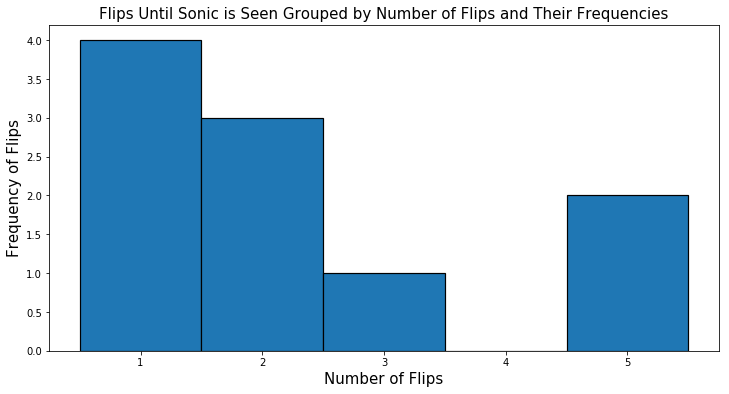

In [22]:
df = pd.read_csv("flipadelphia.csv", header = None, usecols=[0], names=['Flips'])
my_bins = [0.5,1.5,2.5,3.5,4.5,5.5]
plt.figure(figsize=(12,6))
plt.hist(df['Flips'], bins=my_bins,edgecolor='black', linewidth=1.2)
plt.ylabel("Frequency of Flips", fontsize = 15)
plt.xlabel("Number of Flips", fontsize = 15)
plt.title("Flips Until Sonic is Seen Grouped by Number of Flips and Their Frequencies", fontsize = 15)

**Part B:** Use the distribution that you identified in Part A to determine $P(X=n \mid p_S=0.5)$, the probability that Amy would observe the first Sonic flip on the $n$-th flip, assuming that the coin is fair ($p_S=0.5$), for each of the $n$ from her 10 trials in her data set. Then, combine these to find the overall *likelihood* that she would observe her entire data set, assuming that the coin was fair. That is, estimate $P(\text{data} \mid p_S=0.5)$. Be sure to note any assumptions you make about how the outcome of one trial relates to the outcomes of the others.

If it helps to have some mathematical notation, consider that Amy's data set consists of the results of all 10 of her trials: $$\text{data} = (X_1 = n_1) \cap (X_2 = n_2) \cap \ldots (X_{10} = n_{10})$$

# Be sure to note any assumptions you make about how the outcome of one trial relates to the outcomes of the others.
The assumption that I am making about how the outcome of one trial relates to the outcomes of the others is that they are __independent__. 
# Solution in Mathematical Notation 
$\large P(X = 1 \mid ps = 0.5) = 0.5$ 
<br><br>
$\large P(X = 2 \mid ps = 0.5) = 0.25$
<br><br>
$\large P(X = 3 \mid ps = 0.5) = 0.125$
<br><br>
$\large P(X = 5 \mid ps = 0.5) = 0.03125$
<br><br>
$\large P(data \mid ps = 0.5) \approx 0.00000011920928955078125$
<br><br>
This was attained from the code below. 

In [8]:
#P(X = 1 | ps = 0.5)
PX1 = 0.5*(1-0.5)**0.0
print("P(X = 1 | ps = 0.5) = {}".format(PX1))
#P(X = 2 | ps = 0.5)
PX2 = 0.5*(1-0.5)**1.0
print("P(X = 2 | ps = 0.5) = {}".format(PX2))
#P(X = 3 | ps = 0.5)
PX3 = 0.5*(1-0.5)**2.0
print("P(X = 3 | ps = 0.5) = {}".format(PX3))
#P(X = 5 | ps = 0.5)
PX5 = 0.5*(1-0.5)**4.0
print("P(X = 5 | ps = 0.5) = {}".format(PX5))
#P(data | ps = 0.5)
PDATA = (PX1**4) * (PX2**3) * (PX3 ** 1) * (PX5 ** 2) 
print("P(data | ps = 0.5) = {:.23f}".format(PDATA))

P(X = 1 | ps = 0.5) = 0.5
P(X = 2 | ps = 0.5) = 0.25
P(X = 3 | ps = 0.5) = 0.125
P(X = 5 | ps = 0.5) = 0.03125
P(data | ps = 0.5) = 0.00000011920928955078125


**Part C:** Suppose before we observed Amy's data set, we believe that each of the seven possible coin biases occur with equal probability, $P(p_S)$. This is called the _prior distribution_ for the coin bias, $p_S$, because we have not yet taken into account Amy's data set.
* Now, estimate the probability of each possible bias, given the data: $P(p_S \mid \text{data})$.  This is called the _posterior distribution_ for the coin bias, because it is our assessment of the coin's bias _after_ we have accounted for Amy's data.
* Make a line plot of the bias along x-axis versus the posterior probability of that bias along the y-axis, and be sure to label your axes. 
* Comment on your plot. What appears to be the most probable value for the bias, $p_S$? This is called the _maximum a posteriori_ estimate, because it maximizes the posterior distribution and sounds very, *very* fancy.

Using Baye's Theorem, we want: 
<br><br>
$ P(ps \mid data) = $
<br><br>
$\frac{P(data \mid ps)P(ps)}{P(data \mid ps = 0.2)P(ps = 0.2) + P(data \mid ps = 0.3)P(ps = 0.3) + P(data \mid ps = 0.4)P(ps = 0.4) + P(data \mid ps = 0.5)P(ps = 0.5) +  P(data \mid ps = 0.6)P(ps = 0.6) + P(data \mid ps = 0.7)P(ps = 0.7) + P(data \mid ps = 0.8)P(ps = 0.8)}$
# Comment on your plot. What appears to be the most probable value for the bias,  $p_s$ ?
The most probable value for the bias, $p_s$ appears to be 0.4. I say this because at this bias we can see that the posterior distribution is maximized, so this is the maximum a posteriori. 

Text(0.5, 1.0, 'Relation Between Bias and Posterior Probability')

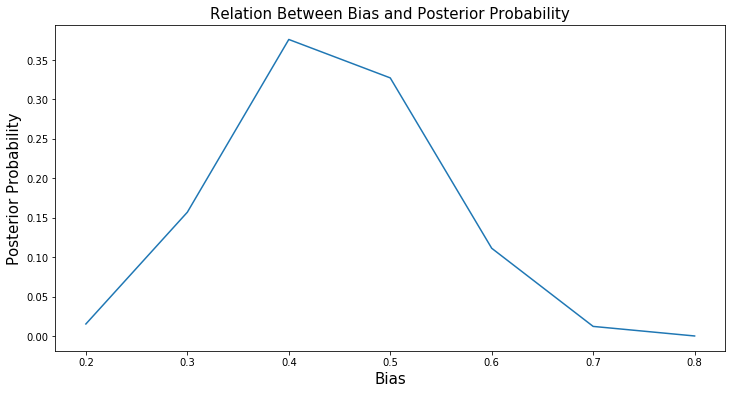

In [9]:
def dataGivenPS(ps):
    PX1 = ps*(1-ps)**0
    PX2 = ps*(1-ps)**1
    PX3 = ps*(1-ps)**2
    PX5 = ps*(1-ps)**4
    return (PX1**4) * (PX2**3) * (PX3**1) * (PX5**2)

def plotUniform():
    probPS = 1/7
    psArr = [0.2,0.3,0.4,0.5,0.6,0.7,0.8]
    pPSXDATAarr = []
    for x in psArr:
        pDataPSX = dataGivenPS(x)
        pPSXDATA = (pDataPSX * probPS)/(dataGivenPS(0.2)*probPS + dataGivenPS(0.3)*probPS + dataGivenPS(0.4)*probPS + dataGivenPS(0.5)*probPS + dataGivenPS(0.6)*probPS + dataGivenPS(0.7)*probPS + dataGivenPS(0.8)*probPS)
        pPSXDATAarr.append(pPSXDATA)
    return psArr, pPSXDATAarr

plt.figure(figsize=(12,6))
x, y = plotUniform()
plt.plot(x, y)
plt.xlabel("Bias", fontsize = 15)
plt.ylabel("Posterior Probability", fontsize = 15)
plt.title("Relation Between Bias and Posterior Probability", fontsize = 15)

**Part D:** Now suppose the prior probability distribution of the coins is not uniform. Namely, suppose these probabilities follow a ***triangular distribution***, centered at $p_S=0.5$:
$$P(p_S = p) = \begin{cases} mp & p \leq 0.5 \\ m(1-p) & p > 0.5 \end{cases}$$

Determine what value the constant $m$ should have in order to make $P(p_S = p)$ is a valid probability mass function. Remember, $p_S \in \{.2, .3, \ldots , .7, .8\}$ and is discrete.

For $P(p_S = p)$ to be a valid PMF, we need:
<br><br> 
$\large \sum_p P(p_S = p) = 1$
<br><br>
Thus we have: 
<br><br> 
$\large m(0.2) + m(0.3) + m(0.4) + m(0.5) + m(1 - 0.6) + m(1 - 0.7) + m(1 - 0.8) = 1$ 
<br><br>
$\large m(0.2 + 0.3 + 0.4 + 0.5 + (1 - 0.6) + (1 - 0.7) + (1 - 0.8)) = 1$
<br><br>
$\large m(\frac{2}{10} + \frac{3}{10} + \frac{4}{10} + \frac{5}{10} + \frac{4}{10} + \frac{3}{10} + \frac{2}{10}) = 1$
<br><br>
$\large m(\frac{23}{10}) = 1$ 
<br><br>
$\large m = \frac{10}{23}$
<br><br>
So, the value the constant $m$ should have is $\frac{10}{23}$ in order to make $P(p_S = p)$ a valid PMF. 

**Part E:** Compare, using words, the triangular prior distribution (this part) and the uniform prior distribution (from Part C).  What does each represent in terms of our _prior_ knowledge of the coin bias?

The uniform prior distribution represents that our prior knowledge of having a given bias is equally probable at $\frac{1}{7}$. The triangular prior distribution represents that our prior knowledge of having a given bias is not equally probable. This is so because the probabilty of having $P(p_S <= 5)$ is $\frac{10}{23} \cdot p_S$ while having  $ P(p_S > 5)$ is $\frac{10}{23} \cdot (1-p_S).$ 

**Part F:** Modify your calculation of the posterior distribution from Part C to use the new triangular prior distribution from Part D. Make a plot of the results that includes both posterior distribution using the uniform prior (from Part C) and the posterior distribution using the triangular prior (from Part D) in the same figure panel. Be sure to label your axes and include a legend.

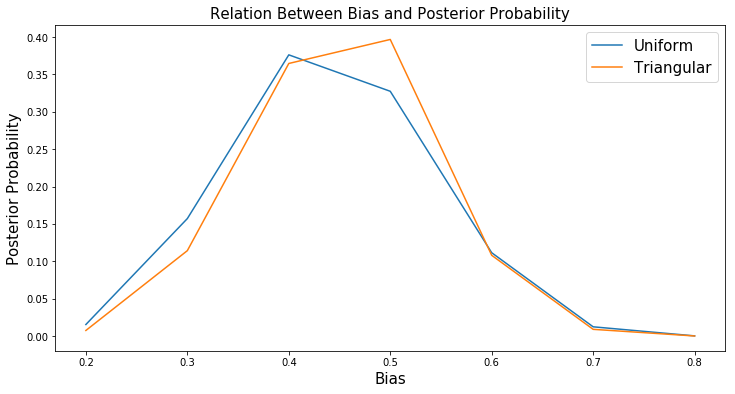

In [10]:
def triangularPS(ps): 
    if(ps <= 0.5):
        return (10/23) * ps
    if(ps > 0.5):
        return (10/23)* (1-ps)
    
def plotTriangular():
    pPSXDataWithTarr =[]
    psArr = [0.2,0.3,0.4,0.5,0.6,0.7,0.8]
    for x in psArr: 
        pDataPSXTri = dataGivenPS(x)
        pPSXDATATri = (pDataPSXTri * triangularPS(x))/((dataGivenPS(0.2)*triangularPS(0.2)) + (dataGivenPS(0.3)*triangularPS(0.3)) + (dataGivenPS(0.4)*triangularPS(0.4)) + (dataGivenPS(0.5)*triangularPS(0.5)) + (dataGivenPS(0.6)*triangularPS(0.6)) + (dataGivenPS(0.7)*triangularPS(0.7)) + (dataGivenPS(0.8)*triangularPS(0.8)))
        pPSXDataWithTarr.append(pPSXDATATri)
    return psArr, pPSXDataWithTarr

plt.figure(figsize=(12,6))
xU, yU = plotUniform()
xT, yT = plotTriangular()
plt.plot(xU, yU, label = "Uniform")
plt.plot(xT,yT, label = "Triangular")
plt.xlabel("Bias", fontsize = 15)
plt.ylabel("Posterior Probability", fontsize = 15)
plt.title("Relation Between Bias and Posterior Probability", fontsize = 15)
plt.legend(fontsize = 15)

**Part G:** Comment on the effect of your choice of different prior distribution on your posterior inference for the most probable coin bias.

$\large P(p_S)$ = prior distribution
<br><br>
$\large P(p_S \mid data)$ = posterior distribution
<br><br> 
The most probable coin bias when following a triangular distribution is 0.5 and when following a uniform distribution is 0.4. We can see that using the same data set, this difference in the distribution of biases will change which bias is the most probable. Thus, when we have the triangular distribution, the most probable coin bias is 0.5, which means that it is most likely that we have equal chance of seeing Sonic or Tails given the data we have.  

<br>

---
[Back to top](#top)
<a id='bot'></a>